In [1]:
import os
import math
from sklearn import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.io import imread
import itertools

In [2]:
image = imread('parrots.jpg')

In [3]:
from skimage import img_as_float

In [4]:
smth = img_as_float(image)

In [11]:
y, x, _ = smth.shape

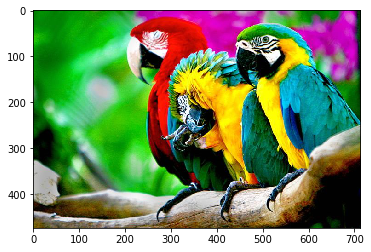

In [12]:
plt.imshow(smth)

In [13]:
data = smth.reshape(y*x, 3)

In [14]:
model = cluster.KMeans(init = 'k-means++', random_state = 241)

In [15]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=241, tol=0.0001, verbose=0)

In [16]:
model.cluster_centers_

array([[0.05423468, 0.11682752, 0.05047563],
       [0.45177017, 0.66592356, 0.44071989],
       [0.61331377, 0.21417919, 0.06302829],
       [0.09561063, 0.63557924, 0.06684756],
       [0.95426566, 0.82764394, 0.04109478],
       [0.7874009 , 0.82310216, 0.79768653],
       [0.77700002, 0.0910021 , 0.69020856],
       [0.04562703, 0.55173992, 0.59907629]])

In [17]:
data_clust_mean = np.copy(data)
data_clust_median = np.copy(data)

labels = np.unique(model.labels_)

for label in labels:
    
    cluster_ = data[model.labels_ == label]
    indices = np.argwhere(model.labels_ == label)
    
        
    r_mean = np.mean(cluster_[:, 0])
    g_mean = np.mean(cluster_[:, 1])
    b_mean = np.mean(cluster_[:, 2])
    r_median = np.median(cluster_[:, 0])
    g_median = np.median(cluster_[:, 1])
    b_median = np.median(cluster_[:, 2])
    
    for index in indices:
        
        data_clust_mean[index, 0] = r_mean
        data_clust_mean[index, 1] = g_mean
        data_clust_mean[index, 2] = b_mean
        
        data_clust_median[index, 0] = r_median
        data_clust_median[index, 1] = g_median
        data_clust_median[index, 2] = b_median
        

In [18]:
def psnr(true, pred):
    
    MSE = metrics.mean_squared_error(true, pred)
    MSE = np.mean(MSE)
    
    PSNR = 10*np.log10(1/MSE)
    
    return PSNR

In [19]:
mean_err = psnr(data, data_clust_mean)
median_err = psnr(data, data_clust_median)

In [20]:
data.shape

(337962, 3)

In [21]:
mean_err

18.436821887142095

In [22]:
median_err

18.139924309849217

In [23]:
test = data.reshape(y,x,3)

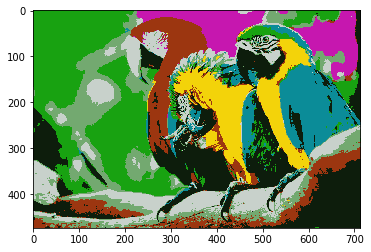

In [24]:
plt.imshow(data_clust_mean.reshape(y,x,3))

In [26]:
psnrr = 0
n_clust = 1
ax = []
psnr_arr = []

while psnrr < 20:
    
    model = cluster.KMeans(init = 'k-means++', random_state = 241, n_clusters = n_clust)
    model.fit(data)
    
    data_clust_mean = np.copy(data)

    labels = np.unique(model.labels_)

    for label in labels:
    
        cluster_ = data[model.labels_ == label]
        indices = np.argwhere(model.labels_ == label)

        r_mean = np.mean(cluster_[:, 0])
        g_mean = np.mean(cluster_[:, 1])
        b_mean = np.mean(cluster_[:, 2])

        for index in indices:

            data_clust_mean[index, 0] = r_mean
            data_clust_mean[index, 1] = g_mean
            data_clust_mean[index, 2] = b_mean
      
    ax.append(data_clust_mean.reshape(y,x,3))
    
    psnrr = psnr(data, data_clust_mean)
    psnr_arr.append(psnrr)
    
    print('N_clusters = {}, PSNR = {}'.format(n_clust, psnrr))
    
    n_clust += 1

N_clusters = 1, PSNR = 9.818835544770995
N_clusters = 2, PSNR = 12.080169160401915
N_clusters = 3, PSNR = 13.153505870293303
N_clusters = 4, PSNR = 14.367827815131912
N_clusters = 5, PSNR = 15.527189418513869
N_clusters = 6, PSNR = 16.543992212339486
N_clusters = 7, PSNR = 17.64099386447652
N_clusters = 8, PSNR = 18.436821887142095
N_clusters = 9, PSNR = 19.11266696752748
N_clusters = 10, PSNR = 19.640743436783623
N_clusters = 11, PSNR = 20.127560009764366


In [27]:
file = open('answer_1.txt', 'w')
file.write('2')
file.close()

In [28]:
%matplotlib inline

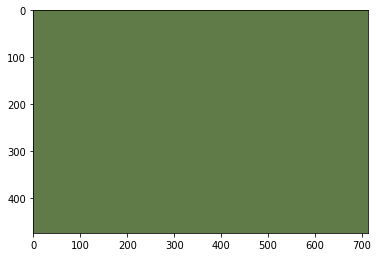

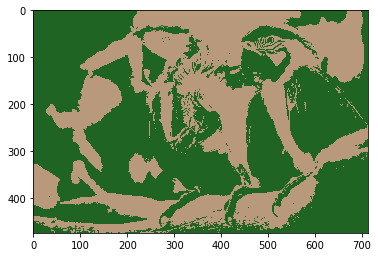

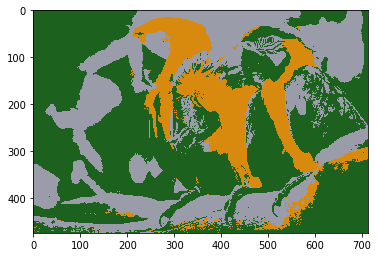

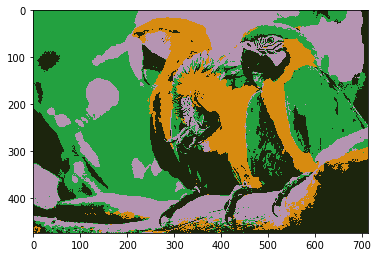

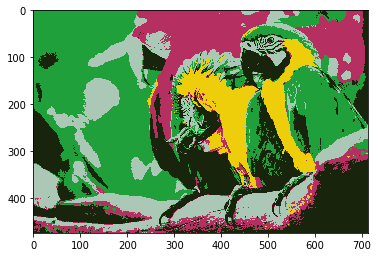

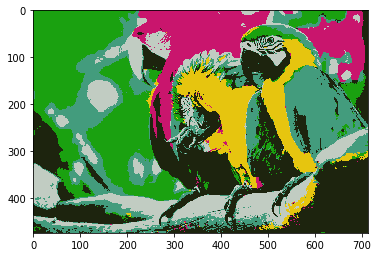

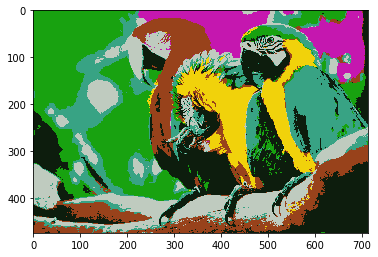

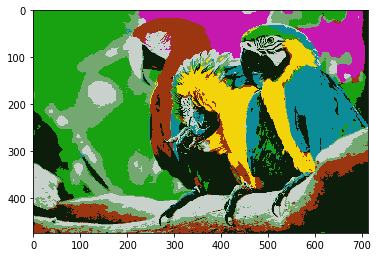

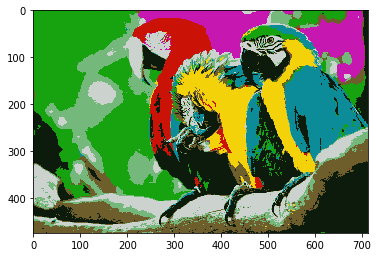

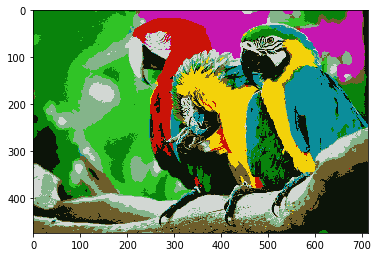

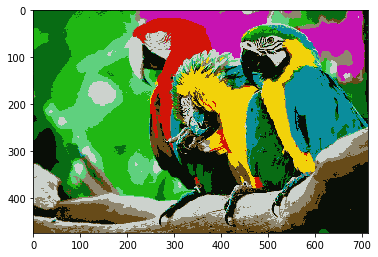

In [29]:
import os
os.makedirs('Result', exist_ok = True)

for i in range (0, n_clust-1):
    
    fig, axx = plt.subplots(figsize = (6, 6))
    axx.imshow(ax[i])
    plt.savefig('Result/{} clusters, {} psnr.jpg'.format(i+1, round(psnr_arr[i], 1)), format = 'jpg', dpi = 300)
    